# **SpaceX  Falcon 9 First Stage Landing Prediction**


## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


In [1]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

## Exploratory Data Analysis


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [2]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


In [3]:
df['Date'].shape

(90,)

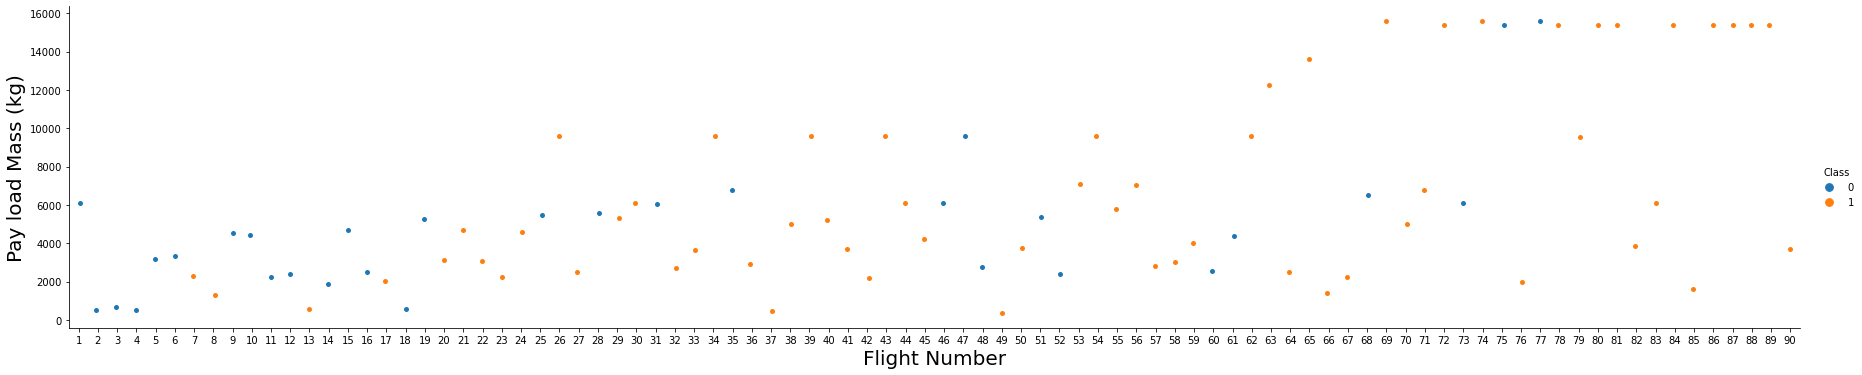

In [4]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

We see that different launch sites have different success rates.  <code>CCAFS LC-40</code>, has a success rate of 60 %, while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> has a success rate of 77%.


### Visualizing the relationship between Flight Number and Launch Site


Text(0, 0.5, 'Launch Site')

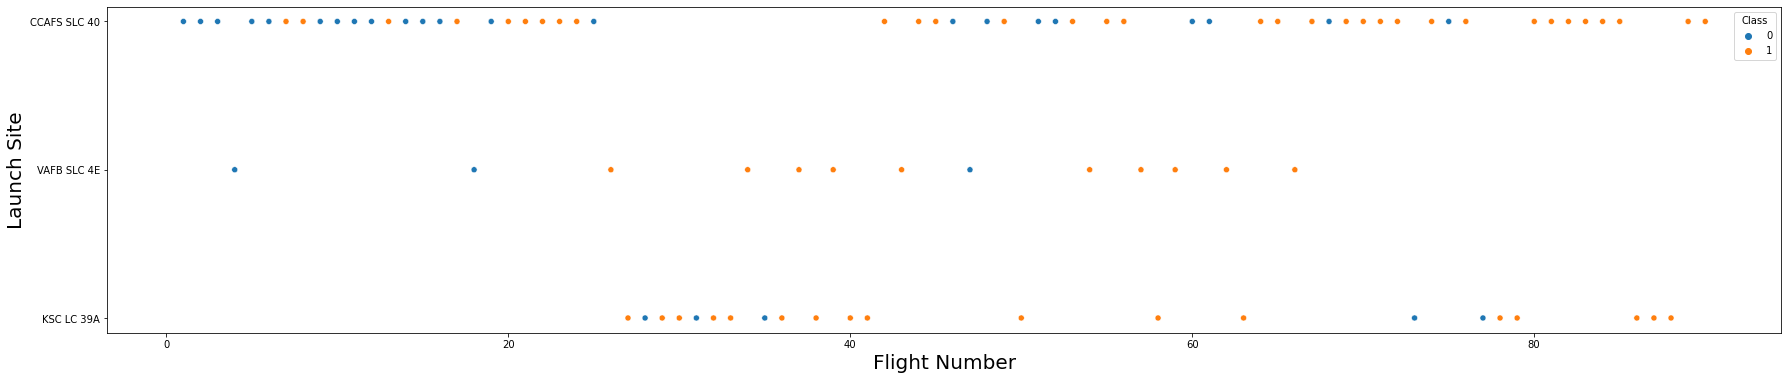

In [5]:
plt.figure(figsize=(30,6))
sns.scatterplot(x='FlightNumber', y='LaunchSite', data=df, hue='Class')
plt.xlabel('Flight Number', fontsize=20)
plt.ylabel('Launch Site', fontsize=20)

   We see that <code>CCAFS SLC 40</code> has seen the most number of successful landings as it has been used the most launch site for missions, although in terms of drawing a comparison between the respecticve ratios of success to failure, we observe that <code>KSC LC 39A</code> is the most successful

### Visualizing the relationship between Payload and Launch Site


We also want to observe if there is any relationship between launch sites and their payload mass.


Text(0, 0.5, 'Launch Site')

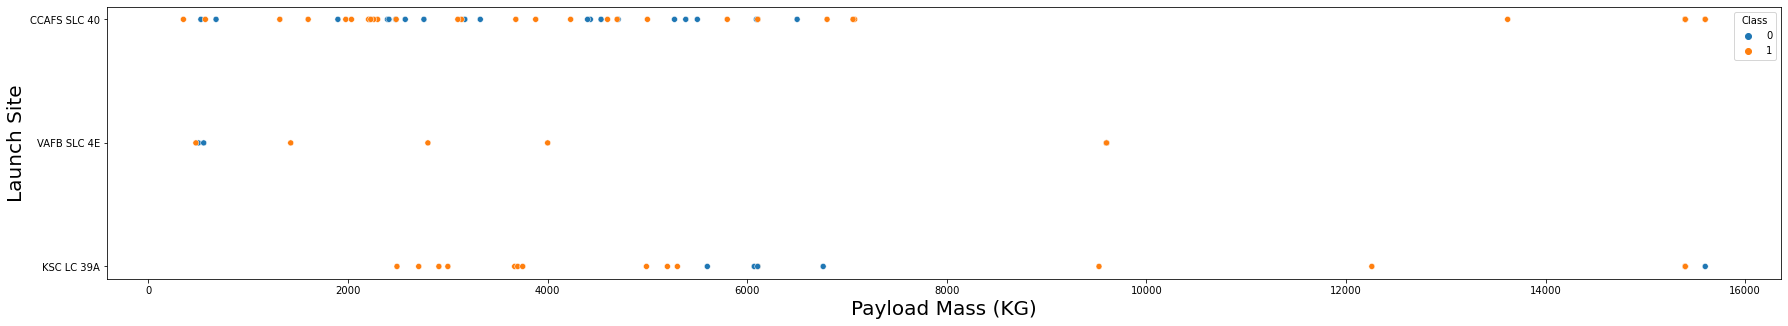

In [6]:
plt.figure(figsize=(30,5))
sns.scatterplot(x='PayloadMass', y='LaunchSite', data=df, hue='Class')
plt.xlabel('Payload Mass (KG)', fontsize=20)
plt.ylabel('Launch Site', fontsize=20)

We can observe that the <code>CCAFS SLC 40</code> launch site has been used the most while the <code>VAFB SLC 4E</code> launch site has been used the least. The <code>CCFAS SLC 40</code> has seen the highest number of succesful launches and we also observe that as the flight number increases, the number of successful missions also increases.

### Visualizing the relationship between success rate of each orbit type


Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


In [7]:
df.Class.groupby(df['Orbit']).mean()

Orbit
ES-L1    1.000000
GEO      1.000000
GTO      0.518519
HEO      1.000000
ISS      0.619048
LEO      0.714286
MEO      0.666667
PO       0.666667
SO       0.000000
SSO      1.000000
VLEO     0.857143
Name: Class, dtype: float64

Text(0, 0.5, 'Class')

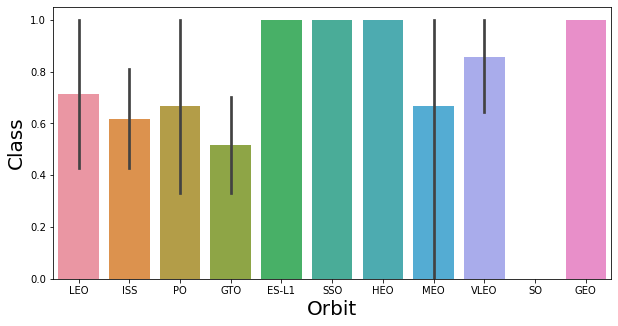

In [8]:
plt.figure(figsize=(10,5))
sns.barplot(x='Orbit', y='Class', data=df)
plt.xlabel('Orbit', fontsize=20)
plt.ylabel('Class', fontsize=20)

The orbits ES-L1, SSO, HEO and GEO have had the highest rates of success so far. The orbit SO has not been accounted for as we can see there is no data available indicating that SO orbit has not been used. The GTO orbit has seen the least successful missions.

### Visualizing the relationship between FlightNumber and Orbit type


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


Text(0, 0.5, 'Orbit')

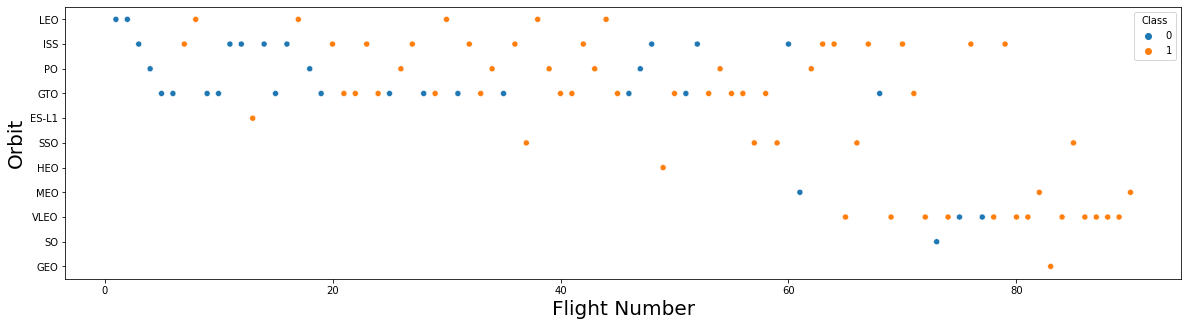

In [9]:
plt.figure(figsize=(20,5))
sns.scatterplot(x='FlightNumber', y='Orbit', data=df, hue='Class')
plt.xlabel('Flight Number', fontsize=20)
plt.ylabel('Orbit', fontsize=20)

You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.


### Visualizing the relationship between Payload and Orbit type


Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


Text(0, 0.5, 'Orbit')

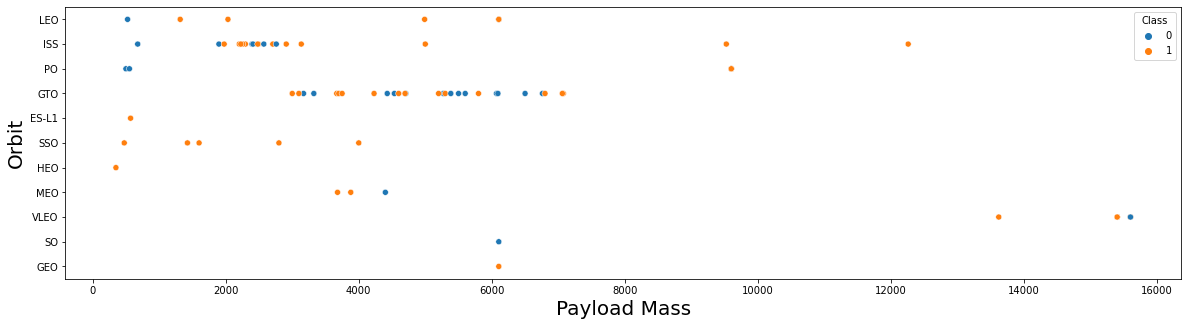

In [10]:
plt.figure(figsize=(20,5))
sns.scatterplot(x='PayloadMass', y='Orbit', data=df, hue='Class')
plt.xlabel('Payload Mass', fontsize=20)
plt.ylabel('Orbit', fontsize=20)

You should observe that Heavy payloads have a negative influence on GTO orbits and positive on GTO and Polar LEO (ISS) orbits.


### Visualizing the launch success yearly trend


In [11]:
# A function to Extract years from the date 
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year    

In [12]:
years = df['Date'].tolist()

In [13]:
len(years)

90

In [14]:
year = Extract_year(years)

In [15]:
year = np.array(year)

In [16]:
year.size

90

In [25]:
successratelist = []
successrate = 0.00
records = 1
data = 0

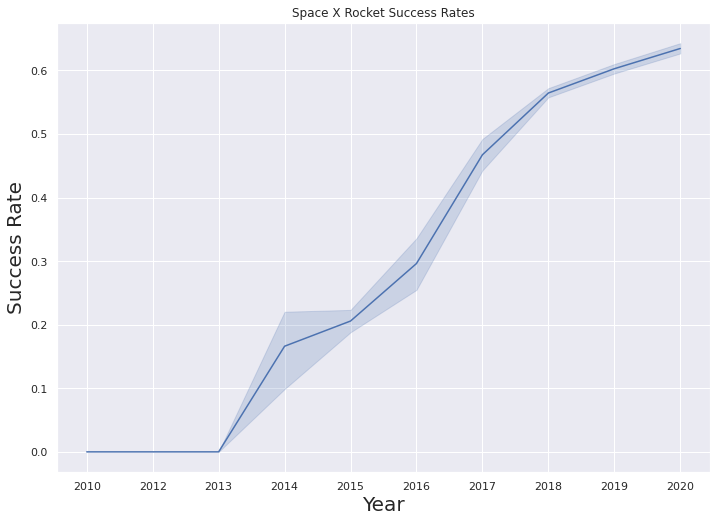

In [26]:
for x in df['Class']:
    data = x + data
    successrate = data/records
    successratelist.append(successrate)
    records= records +1
    
successratelist = np.array(successratelist)
d = {'successrate':successratelist,'year':year}
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data=d, x="year", y="successrate" )

plt.xlabel("Year",fontsize=20)
plt.title('Space X Rocket Success Rates')
plt.ylabel("Success Rate",fontsize=20)
plt.show()

We can observe that the sucess rate since 2013 kept increasing till 2020


## Features Engineering


In [27]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


### Creating dummy variables for categorical columns


In [28]:
df.Outcome.value_counts()

True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
None ASDS       2
False Ocean     2
False RTLS      1
Name: Outcome, dtype: int64

In [29]:
# Using get_dummies() function on the categorical columns
one_hot_orbit = pd.get_dummies(df['Orbit'])
one_hot_launch = pd.get_dummies(df['LaunchSite'])
one_hot_landing = pd.get_dummies(df['LandingPad'])
one_hot_serial = pd.get_dummies(df['Serial'])

# reset the indices
one_hot_launch.reset_index(inplace=True,drop=True)
one_hot_orbit.reset_index(inplace=True,drop=True)
one_hot_landing.reset_index(inplace=True,drop=True)
one_hot_serial.reset_index(inplace=True,drop=True)

features_one_hot = pd.concat([one_hot_orbit,one_hot_launch,one_hot_landing,one_hot_serial],axis=1)
features_one_hot.head()

,ES-L1,GEO,GTO,HEO,ISS,LEO,MEO,PO,SO,SSO,...,B1048,B1049,B1050,B1051,B1054,B1056,B1058,B1059,B1060,B1062
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Casting all numeric columns to `float64`


Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>


In [30]:
features_one_hot=features_one_hot.astype(np.float64)